<a href="https://colab.research.google.com/github/nisha1365/CTS-20-Projects/blob/main/ubiquant_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This dataset contains features derived from real historic data from thousands of investments. Your challenge is to predict the value of an obfuscated metric relevant for making trading decisions**.



**Files**
train.csv

**row_id** - A unique identifier for the row.

**time_id **- The ID code for the time the data was gathered. The time IDs are in order, but the real time between the time IDs is not constant and will likely be shorter for the final private test set than in the training set.

**investment_id** - The ID code for an investment. Not all investment have data in all time IDs.

**target** - The target.
[f_0:f_299] - Anonymized features generated from market data.
**example_test.csv** - Random data provided to demonstrate what shape and format of data the API will deliver to your notebook when you submit.

**example_sample_submission.csv** - An example submission file provided so the publicly accessible copy of the API provides the correct data shape and format.

supplemental_train.csv - Once submissions are locked on April 18th, the hidden test set copy of this file will be replaced with the data currently used for the public leaderboard. Until then it will contain randomly generated noise of the correct shape to assist with debugging.

ubiquant/ - The image delivery API that will serve the test set. You may need Python 3.7 and a Linux environment to run the example test set through the API offline without errors.

**Time-series API Details**

The API serves the data in batches, with all of rows for a single time time_id per batch.

Expect to see roughly one million rows in the test set.

The API will require roughly 0.25 GB of memory after initialization. The initialization step (env.iter_test()) will require meaningfully more memory than that; we recommend you do not load your model until after making that call.

The API will also use less than 15 minutes of runtime for loading and serving the data.

Load data files
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display_html, HTML

lbs = []
lbs.append(pd.read_csv("../input/ubiquant-leaderboards/ubiquant-market-prediction-publicleaderboard.csv"))
#lbs.append(pd.read_csv("../input/ubiquant-leaderboards/ubiquant-market-prediction-publicleaderboard_update1.csv"))
lbs.append(pd.read_csv("../input/ubiquant-leaderboards/ubiquant-market-prediction-publicleaderboard_update2.csv"))
lbs.append(pd.read_csv("../input/ubiquant-leaderboards/ubiquant-market-prediction-publicleaderboard_update3.csv"))
lbs.append(pd.read_csv("../input/ubiquant-leaderboards/ubiquant-market-prediction-publicleaderboard_update4.csv"))
lbs.append(pd.read_csv("../input/ubiquant-leaderboards/ubiquant-market-prediction-privateleaderboard.csv"))

def print_header(text, size=1):
    display_html(HTML("<h{}>{}</h{}>".format(size, text, size)))

Build table where each row contains old and new positions and scores
---

In [ ]:
# Concatenate lbs and remove duplicates to get TeamIDs and TeamNames
teams = pd.concat(lbs[::-1]).drop_duplicates(subset="TeamId")[['TeamId', 'TeamName']] # Go through lbs in reverse order to obtain latest team names

teamNames = []
changeTable = []

for index, row in teams.iterrows():
    
    teamId = row['TeamId']
    teamName = row['TeamName']

    pos = []
    score = []
    
    for i in range(len(lbs)):
        elem = lbs[i].loc[lbs[i]['TeamId'] == teamId]
        
        if len(elem) > 0:
            pos.append(elem.index[0] + 1)
            score.append(elem['Score'].iloc[0])
        else:
            pos.append(np.nan)
            score.append(np.nan)

    teamNames.append(teamName)
    changeTable.append([teamId] + pos + score)
    
changeTable = np.array(changeTable)
teamNames = np.array(teamNames)

Entries in the LB after update 1: 2811
Entries in the LB after update 2: 2460
Entries in the LB after update 3: 2453
Entries in the LB after update 4: 2442
Entries in the LB after update 5: 2436


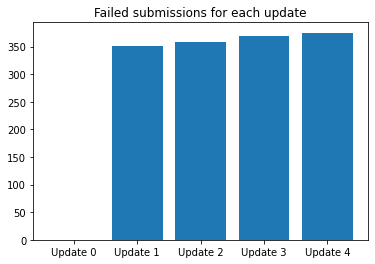

,TeamId,TeamName,SubmissionDate,Score
0,8021093,K I Y,2022-04-19 17:07:10,0.126987
1,8171095,Davide Stenner,2022-04-17 21:49:21,0.123175
2,8020945,hyd,2022-04-19 12:12:23,0.120538
3,8049497,cmanning,2022-03-31 15:50:48,0.120179
4,8091565,ricopue,2022-04-12 13:41:53,0.119853


In [ ]:
lb_lens = []

for i, lb in enumerate(lbs):
    print("Entries in the LB after update {}:".format(i + 1), len(lb))
    lb_lens.append(len(lb))

plt.title("Failed submissions for each update")
plt.bar(["Update {}".format(i) for i in range(len(lbs))], len(changeTable) - np.array(lb_lens)) # Plot successful submissions with each update
plt.show()
lbs[-1].head()

In [ ]:
print("Total entries:", len(changeTable))
remove = np.isnan(np.sum(changeTable[:, 2:].astype(np.float32), axis=1))
teamNames = teamNames[~remove]
changeTable = changeTable[~remove]
print("After removing failed submissions:", len(changeTable))
remove = np.min(changeTable[:, 1 + len(lbs):], axis = 1) == -1
teamNames = teamNames[~remove]
changeTable = changeTable[~remove]
print("After removing -1 submission:", len(changeTable))

Total entries: 2811
After removing failed submissions: 2436
After removing -1 submission: 2397


Change from update 1 to update 2:

Median overall rank/score change:

409.0 0.0419


Median top 1000 rank/score change:

415.5 0.0452


Median top 500 rank/score change:

363.0 0.0465


Median top 200 rank/score change:

413.0 0.0478


Median top 100 rank/score change:

546.0 0.0483


Median top 50 rank/score change:

567.5 0.0488


Median top 20 rank/score change:

376.0 0.0512


Median top 10 rank/score change:

515.0 0.0548


Maximum overall rank improvement:

Team: Vladimir Artus
Rank: 2047 -> 11
Score: 0.1362 -> 0.1163


Maximum top 1000 rank improvement:

Team: Lindada
Rank: 1219 -> 9
Score: 0.1497 -> 0.1171


Maximum top 500 rank improvement:

Team: Tang Tun Yu
Rank: 662 -> 20
Score: 0.1538 -> 0.1145


Maximum top 200 rank improvement:

Team: Charles #2
Rank: 221 -> 14
Score: 0.1557 -> 0.1153


Maximum top 100 rank improvement:

Team: LEM
Rank: 61 -> 3
Score: 0.1564 -> 0.1214


Maximum top 50 rank improvement:

Team: K I Y
Rank: 16 -> 1
Score: 0.1589 -> 0.1301


Maximum top 20 rank improvement:

Team: K I Y
Rank: 16 -> 1
Score: 0.1589 -> 0.1301


Maximum top 10 rank improvement:

Team: Kaz-U
Rank: 6 -> 15
Score: 0.1618 -> 0.1151


Shakeup rank change histogram

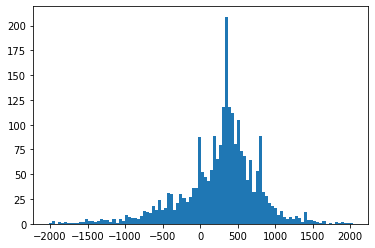

Shakeup score change histogram

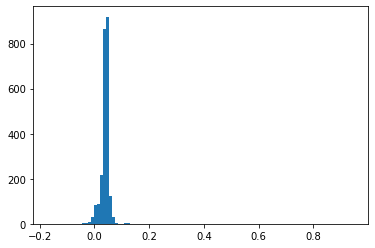

Change from update 2 to update 3:

Median overall rank/score change:

100.0 0.0145


Median top 1000 rank/score change:

144.5 0.0143


Median top 500 rank/score change:

96.5 0.0141


Median top 200 rank/score change:

54.5 0.014


Median top 100 rank/score change:

46.0 0.0132


Median top 50 rank/score change:

16.5 0.0124


Median top 20 rank/score change:

7.0 0.012


Median top 10 rank/score change:

0.5 0.0104


Maximum overall rank improvement:

Team: garjermay
Rank: 1298 -> 35
Score: 0.1029 -> 0.1268


Maximum top 1000 rank improvement:

Team: Michaël Leroy
Rank: 974 -> 34
Score: 0.1058 -> 0.1268


Maximum top 500 rank improvement:

Team: abdellatif sassioui
Rank: 453 -> 22
Score: 0.1091 -> 0.1278


Maximum top 200 rank improvement:

Team: YN_forever_newbie
Rank: 142 -> 26
Score: 0.1102 -> 0.1274


Maximum top 100 rank improvement:

Team: neilron
Rank: 77 -> 19
Score: 0.1111 -> 0.1279


Maximum top 50 rank improvement:

Team: kaggle_rookies
Rank: 40 -> 20
Score: 0.1125 -> 0.1279


Maximum top 20 rank improvement:

Team: Tang Tun Yu
Rank: 20 -> 10
Score: 0.1145 -> 0.1307


Maximum top 10 rank improvement:

Team: cmanning
Rank: 5 -> 2
Score: 0.1209 -> 0.1356


Shakeup rank change histogram

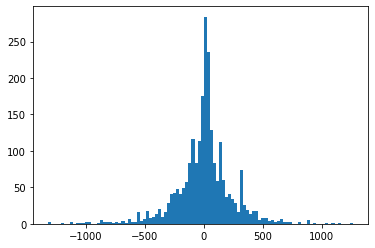

Shakeup score change histogram

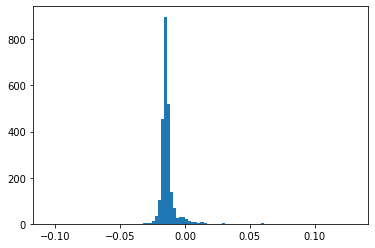

Change from update 3 to update 4:

Median overall rank/score change:

76.0 0.0045


Median top 1000 rank/score change:

91.0 0.0047


Median top 500 rank/score change:

50.5 0.0046


Median top 200 rank/score change:

14.0 0.0047


Median top 100 rank/score change:

16.0 0.0052


Median top 50 rank/score change:

11.5 0.0059


Median top 20 rank/score change:

3.0 0.0051


Median top 10 rank/score change:

3.0 0.0054


Maximum overall rank improvement:

Team: Cassinice
Rank: 1453 -> 500
Score: 0.115 -> 0.1184


Maximum top 1000 rank improvement:

Team: kotaro_chato
Rank: 972 -> 373
Score: 0.121 -> 0.1191


Maximum top 500 rank improvement:

Team: sirlancelot93
Rank: 483 -> 29
Score: 0.1232 -> 0.122


Maximum top 200 rank improvement:

Team: Mengfei Li
Rank: 143 -> 19
Score: 0.1247 -> 0.123


Maximum top 100 rank improvement:

Team: mavillan
Rank: 98 -> 20
Score: 0.1252 -> 0.1229


Maximum top 50 rank improvement:

Team: Arthur Mulikhov
Rank: 47 -> 12
Score: 0.1264 -> 0.1244


Maximum top 20 rank improvement:

Team: Ouranos
Rank: 17 -> 9
Score: 0.1283 -> 0.125


Maximum top 10 rank improvement:

Team: hyd
Rank: 7 -> 4
Score: 0.1315 -> 0.1272


Shakeup rank change histogram

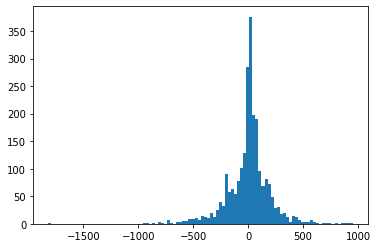

Shakeup score change histogram

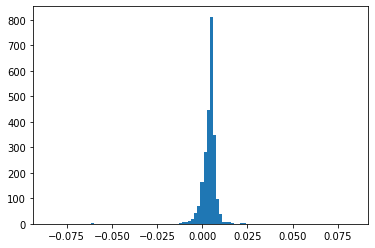

Change from update 4 to update 5:

Median overall rank/score change:

56.0 0.005


Median top 1000 rank/score change:

72.0 0.0051


Median top 500 rank/score change:

51.0 0.005


Median top 200 rank/score change:

20.0 0.0049


Median top 100 rank/score change:

12.5 0.0054


Median top 50 rank/score change:

7.0 0.0055


Median top 20 rank/score change:

2.5 0.0065


Median top 10 rank/score change:

1.0 0.0066


Maximum overall rank improvement:

Team: abdellatif sassioui
Rank: 1840 -> 396
Score: 0.1039 -> 0.113763


Maximum top 1000 rank improvement:

Team: digimagi
Rank: 834 -> 52
Score: 0.1166 -> 0.115976


Maximum top 500 rank improvement:

Team: kartal
Rank: 490 -> 46
Score: 0.1185 -> 0.116171


Maximum top 200 rank improvement:

Team: Xu Wang
Rank: 130 -> 60
Score: 0.12 -> 0.115848


Maximum top 100 rank improvement:

Team: Niek van der Zwaag
Rank: 68 -> 19
Score: 0.1208 -> 0.117601


Maximum top 50 rank improvement:

Team: WuHuDaSiMa
Rank: 42 -> 26
Score: 0.1214 -> 0.117087


Maximum top 20 rank improvement:

Team: kaggle doer
Rank: 18 -> 8
Score: 0.1234 -> 0.119292


Maximum top 10 rank improvement:

Team: hyd
Rank: 4 -> 3
Score: 0.1272 -> 0.120538


Shakeup rank change histogram

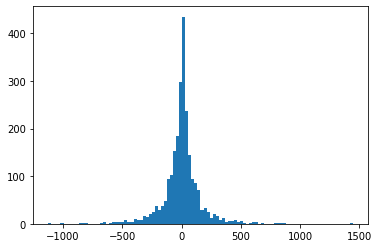

Shakeup score change histogram

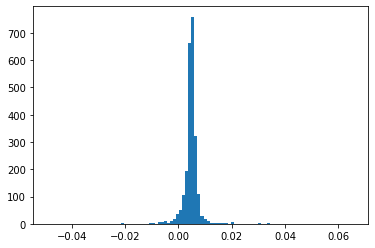

Change from update 1 to update 5:

Median overall rank/score change:

395.0 0.037


Median top 1000 rank/score change:

380.5 0.0406


Median top 500 rank/score change:

369.0 0.0424


Median top 200 rank/score change:

376.0 0.0435


Median top 100 rank/score change:

440.0 0.044


Median top 50 rank/score change:

503.0 0.0447


Median top 20 rank/score change:

207.5 0.0471


Median top 10 rank/score change:

204.0 0.0487


Maximum overall rank improvement:

Team: Vladimir Artus
Rank: 2047 -> 6
Score: 0.1362 -> 0.119543


Maximum top 1000 rank improvement:

Team: Kyle Peters
Rank: 1241 -> 17
Score: 0.1494 -> 0.117721


Maximum top 500 rank improvement:

Team: Tang Tun Yu
Rank: 662 -> 16
Score: 0.1538 -> 0.118057


Maximum top 200 rank improvement:

Team: Charles #2
Rank: 221 -> 12
Score: 0.1557 -> 0.118436


Maximum top 100 rank improvement:

Team: Jacoby Jaeger
Rank: 27 -> 10
Score: 0.1571 -> 0.118456


Maximum top 50 rank improvement:

Team: Jacoby Jaeger
Rank: 27 -> 10
Score: 0.1571 -> 0.118456


Maximum top 20 rank improvement:

Team: K I Y
Rank: 16 -> 1
Score: 0.1589 -> 0.126987


Maximum top 10 rank improvement:

Team: shyjin
Rank: 8 -> 54
Score: 0.1612 -> 0.115946


Shakeup rank change histogram

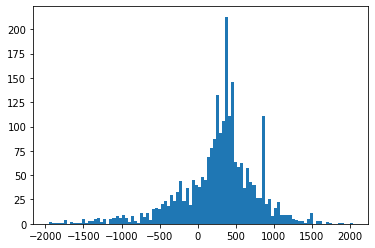

Shakeup score change histogram

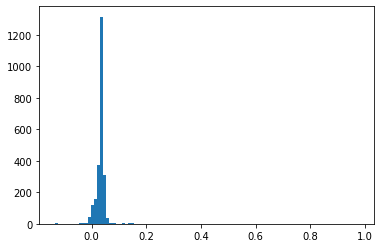

In [ ]:
for i, k in [(0, 1), (1, 2), (2, 3), (3, 4), (0, 4)]:

    print_header("Change from update {} to update {}:".format(i + 1, k + 1))
    
    order = np.argsort(changeTable[:, 1 + i])
    
    sortedTeamNames = teamNames[order]
    sortedChangeTable = changeTable[order]

    print_header("Median overall rank/score change:", 4)
    print(np.median(np.abs(changeTable[:, 1 + i] - changeTable[:, 1 + k])), 
          round(np.median(np.abs(changeTable[:, 1 + len(lbs) + k] - changeTable[:, 1 + len(lbs) + i])), 4))

    for n in [1000, 500, 200, 100, 50, 20, 10]:
        print_header("Median top {} rank/score change:".format(n), 4)
        print(np.median(np.abs(sortedChangeTable[:n, 1 + i] - sortedChangeTable[:n, 1 + k])), 
              round(np.median(np.abs(sortedChangeTable[:n, 1 + len(lbs) + k] - sortedChangeTable[:n, 1 + len(lbs) + i])), 4))
    
    print_header("Maximum overall rank improvement:", 4)
    argtop = np.argmax(sortedChangeTable[:, 1 + i] - sortedChangeTable[:, 1 + k])

    print("Team:", sortedTeamNames[argtop])
    print("Rank:", int(sortedChangeTable[argtop, 1 + i]), "->", int(sortedChangeTable[argtop, 1 + k]))
    print("Score:", sortedChangeTable[argtop, 1 + len(lbs) + i], "->", sortedChangeTable[argtop, 1 + len(lbs) + k])  
    
    for n in [1000, 500, 200, 100, 50, 20, 10]:
        print_header("Maximum top {} rank improvement:".format(n), 4)
        argtop = np.argmax(sortedChangeTable[:n, 1 + i] - sortedChangeTable[:n, 1 + k])

        print("Team:", sortedTeamNames[argtop])
        print("Rank:", int(sortedChangeTable[argtop, 1 + i]), "->", int(sortedChangeTable[argtop, 1 + k]))
        print("Score:", sortedChangeTable[argtop, 1 + len(lbs) + i], "->", sortedChangeTable[argtop, 1 + len(lbs) + k])  
    
    print_header("Shakeup rank change histogram", 4)
    plt.hist(sortedChangeTable[:, 1 + i] - sortedChangeTable[:, 1 + k], 100)
    plt.show()
    
    print_header("Shakeup score change histogram", 4)
    plt.hist(sortedChangeTable[:, 1 + len(lbs) + i] - sortedChangeTable[:, 1 + len(lbs) + k], 100)
    plt.show()

Plot the shakeup
---

In [ ]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

In [ ]:
for i, k in [(0, 1), (1, 2), (2, 3), (3, 4), (0, 4)]:
    
    print_header("Change from update {} to update {}:".format(i + 1, k + 1))
    
    # Scatter old vs new rank
    trace = go.Scatter(x = changeTable[:, 1 + i],
                       y = changeTable[:, 1 + k],
                       mode = "markers",
                       name = "Rank",
                       marker = dict(color = 'rgba(128, 128, 255, 0.8)'),
                       text = np.array(teamNames))

    layout = dict(title = 'Rank Shakeup',
                  xaxis= dict(title= 'Old Rank',ticklen= 5,zeroline= False),
                  yaxis= dict(title= 'New Rank',ticklen= 5,zeroline= False))

    fig = dict(data = [trace], layout = layout)
    iplot(fig)

Change from update 1 to update 2:

Change from update 2 to update 3:

Change from update 3 to update 4:

Change from update 4 to update 5:

Change from update 1 to update 5:

In [ ]:
for i, k in [(0, 1), (1, 2), (2, 3), (3, 4), (0, 4)]:
    
    print_header("Change from update {} to update {}:".format(i + 1, k + 1))
    
    # Scatter old vs new rank
    trace = go.Scatter(x = changeTable[:, 1 + len(lbs) + i],
                       y = changeTable[:, 1 + len(lbs) + k],
                       mode = "markers",
                       name = "Score",
                       marker = dict(color = 'rgba(128, 128, 255, 0.8)'),
                       text= np.array(teamNames))

    layout = dict(title = 'Score Shakeup',
                  xaxis= dict(title= 'Old Score',ticklen= 5,zeroline= False),
                  yaxis= dict(title= 'New Score',ticklen= 5,zeroline= False))

    fig = dict(data = [trace], layout = layout)
    iplot(fig)

Change from update 1 to update 2:

Change from update 2 to update 3:

Change from update 3 to update 4:

Change from update 4 to update 5:

Change from update 1 to update 5:

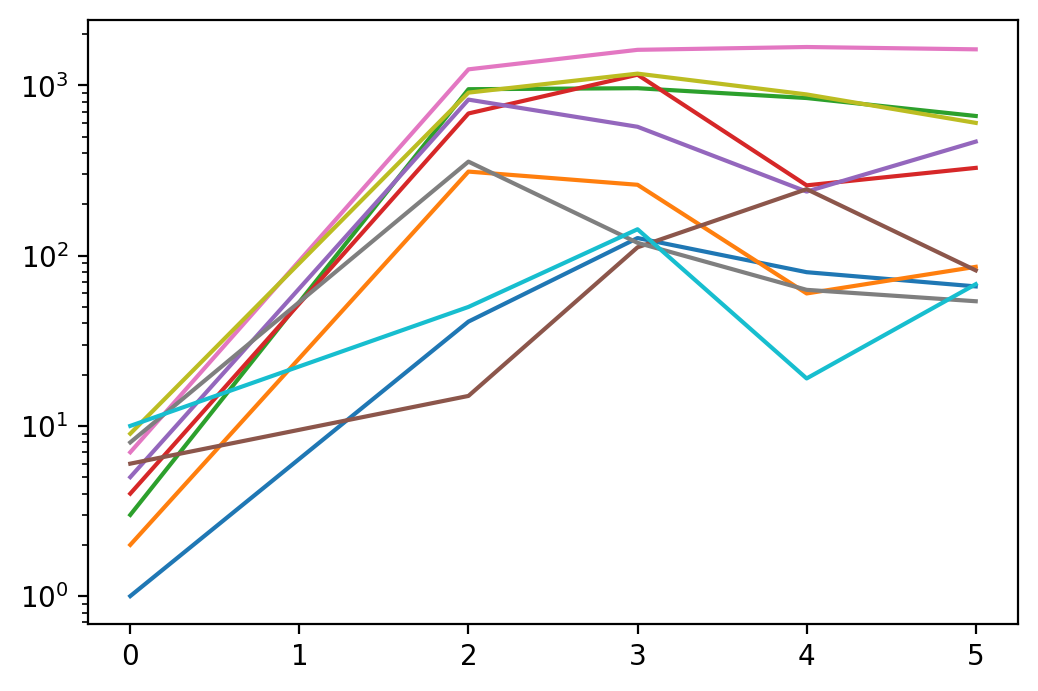

In [ ]:
#  Plot performance of top 10 teams over time
plt.gcf().set_dpi(200)
for i in range(10):
    
    plt.plot(np.array([0, 2, 3, 4, 5]), changeTable[changeTable[:, 1] == i + 1, 1:6][0].astype(np.int32))
    plt.yscale('log')
plt.show()